This notebook will be used to help categorize the Type of Type Ia Supernovae (SNe Ia) that we get from COMPAS and any-subtype from the Taubenberger paper: https://arxiv.org/pdf/1703.00528

In [2]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

In [3]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 


In [4]:
# reading in the HDF5 file that contains the WD+WD rate information
pathTorates_WD = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_WDWD_AIS_1/CosmicIntegration/Rate_info.h5' #path of the hdf5 file

Data_rates_WD = h5.File(pathTorates_WD)

In [5]:
Data_rates_WD.keys()

<KeysViewHDF5 ['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']>

In [6]:
rates_info = Data_rates_WD['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [7]:
# let's now read in the file that has the information in general about our WD+WD
pathToweights_H5 = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_WDWD_AIS_1/MainRun/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [8]:
Data_weights.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>

We want to look at what kinds of WD+WD we have so let's specifically look at BSE_System_Parameters and see what information we can find about the objects that merge within a hubble time (what we expect to forma type Ia SNe)

In [9]:
SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

Let's drop anything that is a stellar merger

In [10]:
not_stellar_merger_bool = SP_WD_data['Merger'] == False
SP_WD_NOT_SM = SP_WD_data[not_stellar_merger_bool]

Let's now make sure we are only looking at when at least one white dwarf is a carbon oxygen white dwarf

In [11]:
cowd_bool = np.logical_or(SP_WD_NOT_SM['Stellar_Type(1)']==11,SP_WD_NOT_SM['Stellar_Type(2)']==11)
COWD_SYS = SP_WD_NOT_SM[cowd_bool]

In [12]:
COWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
0,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,30.0,11,1,1,1,0.000000,13940.060611,0,1.0,9.915128
1,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,30.0,11,11,1,1,0.000000,9025.539968,0,1.0,0.245931
2,113.998209,0.0,1.0,0,0,0,113.998209,0.0,5.388305,0.0,...,30.0,13,11,1,1,102.386505,13767.520389,1,1.0,0.392874
3,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,30.0,11,0,1,0,0.000000,14176.819295,0,1.0,10.000000
7,0.000000,0.0,1.0,1,0,0,0.000000,0.0,0.000000,0.0,...,30.0,11,0,1,0,0.000000,13776.746205,0,1.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,30.0,11,11,1,1,0.000000,1156.571375,0,1.0,0.094042
999996,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,30.0,11,11,1,1,0.000000,913.213610,0,1.0,0.151815
999997,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,30.0,12,11,1,1,0.000000,1503.425822,0,1.0,0.234124
999998,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,30.0,11,11,1,1,0.000000,742.013427,0,1.0,0.115753


Let's now select for the subtype of these binary systems which will actually merge within a hubble time and produce SNe Ia

In [13]:
# first we must prepare our dataset for the calculation 
# Add columns for the more and less massive compact object

COWD_SYS['M_moremass'] = COWD_SYS[['Mass(1)', 'Mass(2)']].max(axis=1)
COWD_SYS['M_lessmass'] = COWD_SYS[['Mass(1)', 'Mass(2)']].min(axis=1)

/tmp/ipykernel_8552/2603660473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COWD_SYS['M_moremass'] = COWD_SYS[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_8552/2603660473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COWD_SYS['M_lessmass'] = COWD_SYS[['Mass(1)', 'Mass(2)']].min(axis=1)


In [14]:
time_col_cowd = useful_fncs.tgw((COWD_SYS['SemiMajorAxis'].values),(COWD_SYS['Eccentricity']),(COWD_SYS['M_moremass'].values),(COWD_SYS['M_lessmass'].values),Data_weights,'BSE_System_Parameters','SemiMajorAxis')

/srv/conda/envs/notebook/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [15]:
COWD_SYS['Coalescence_Time'] = time_col_cowd

/tmp/ipykernel_8552/333769032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COWD_SYS['Coalescence_Time'] = time_col_cowd


In [16]:
# let's calculate the delay time
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time = np.array(COWD_SYS['Time'])*1e6
t_col = np.array(time_col_cowd)*1e6

t_delay = [] # this will hold the delay time in yr

for binaries in range(COWD_SYS.shape[0]):

    delay = time[binaries] + t_col[binaries] # adding the two values together to get the delay time
    t_delay.append(delay)

In [17]:
# let's make this list an array and add it to our dataframe
t_delay_array = np.array(t_delay)

COWD_SYS['Delay_Time(Yr)']=t_delay_array

/tmp/ipykernel_8552/2048846485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COWD_SYS['Delay_Time(Yr)']=t_delay_array


In [18]:
# let's look at our dataframe now
COWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay_Time(Yr)
0,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,1,0.000000,13940.060611,0,1.0,9.915128,0.745539,0.679584,6.717356e+21,6.717356e+27
1,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,1,0.000000,9025.539968,0,1.0,0.245931,0.890890,0.558981,3.251682e+23,3.251682e+29
2,113.998209,0.0,1.0,0,0,0,113.998209,0.0,5.388305,0.0,...,1,102.386505,13767.520389,1,1.0,0.392874,1.213017,0.733545,NaN,NaN
3,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,0,0.000000,14176.819295,0,1.0,10.000000,0.553602,0.180391,3.949743e+17,3.949743e+23
7,0.000000,0.0,1.0,1,0,0,0.000000,0.0,0.000000,0.0,...,0,0.000000,13776.746205,0,1.0,10.000000,0.595781,0.199647,7.663460e+04,9.041135e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,1,0.000000,1156.571375,0,1.0,0.094042,1.275749,0.658100,6.959760e+21,6.959760e+27
999996,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,1,0.000000,913.213610,0,1.0,0.151815,0.780910,0.722761,6.594915e+18,6.594915e+24
999997,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,1,0.000000,1503.425822,0,1.0,0.234124,1.381447,0.667080,1.988156e+19,1.988156e+25
999998,0.000000,0.0,1.0,0,0,0,0.000000,0.0,0.000000,0.0,...,1,0.000000,742.013427,0,1.0,0.115753,0.942527,0.770343,5.556545e+19,5.556545e+25


We only care about systems that have a delay time within the age of the universe because then we will actually "see" them merge

In [19]:
# first let's take the delay time column and make it a numpy array
delay_time_myr = np.array(COWD_SYS['Delay_Time(Yr)'])*(1e-6)

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

hubble_merger = []

for times in delay_time_myr:

    if (times > age_universe):
        hubble_merger.append(0)

    elif (times < age_universe):
        hubble_merger.append(1)

# there are some coalescence times that have a NaN value so for now let's say they do not merge within a hubble time (got back to investigate)
    else:
        hubble_merger.append(0)

In [20]:
COWD_SYS['GW_Merger'] = hubble_merger

/tmp/ipykernel_8552/1353018277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COWD_SYS['GW_Merger'] = hubble_merger


In [23]:
# let's not take a slice of the data that does merge within a hubble time
gw_merger_bool = COWD_SYS['GW_Merger'] == True
COWD_SYS_GW = COWD_SYS[gw_merger_bool]
COWD_SYS_GW

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay_Time(Yr),GW_Merger
29,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,1536.080151,0,1.0,7.360919,0.483516,0.394784,64.106710,1.600187e+09,1
86,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,8874.314167,0,1.0,7.842265,0.568929,0.211294,0.049491,8.874364e+09,1
87,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,4428.913115,0,1.0,10.000000,0.526926,0.320580,8321.641517,1.275055e+10,1
97,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,1390.603090,0,1.0,9.999991,0.679873,0.276373,441.783850,1.832387e+09,1
128,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,3852.634168,0,1.0,9.992004,0.527024,0.316107,7164.965181,1.101760e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999745,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,109.254748,0,1.0,0.298381,1.083912,0.772944,325.360612,4.346154e+08,1
999761,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,940.615944,0,1.0,0.254697,0.770769,0.396774,2834.654788,3.775271e+09,1
999871,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,1787.995323,0,1.0,0.212650,0.954424,0.569040,1073.100464,2.861096e+09,1
999912,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,382.472452,0,1.0,0.160558,0.773363,0.658614,3009.383390,3.391856e+09,1


The above is a much larger shape than what I am used to because this dataframe consideres stars that are not white dwarfs for the companion star

Let's look at the types of stellar types that are in these binaries

Text(0, 0.5, 'Number of Binaries')

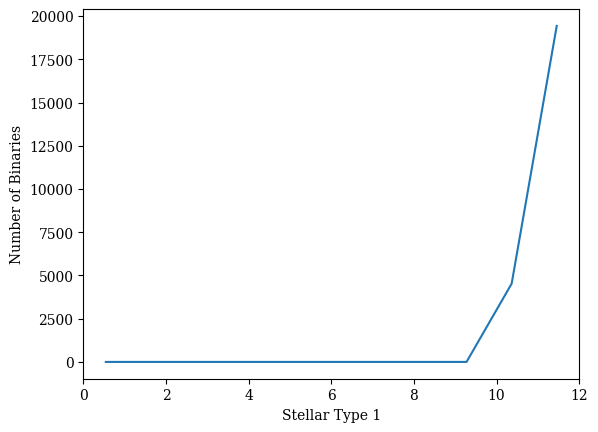

In [30]:
# let's make a histogram of the primary stellar types and secondary stellar types
hist, bin_edges = np.histogram(COWD_SYS_GW['Stellar_Type(1)'], weights=COWD_SYS_GW['mixture_weight'],bins=np.linspace(0,12,12))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Stellar Type 1")
plt.ylabel("Number of Binaries")

Text(0, 0.5, 'Number of Binaries')

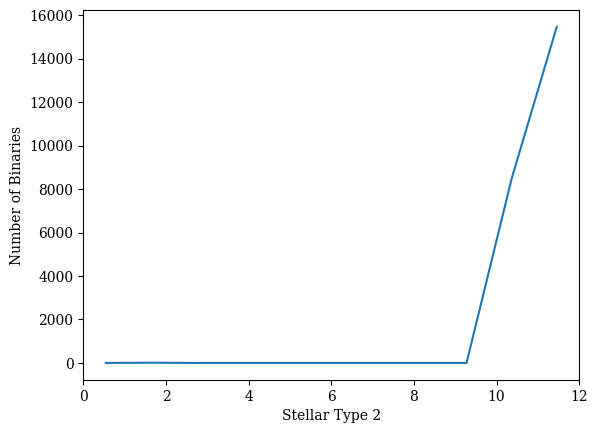

In [31]:
# let's make a histogram of the primary stellar types and secondary stellar types
hist, bin_edges = np.histogram(COWD_SYS_GW['Stellar_Type(2)'], weights=COWD_SYS_GW['mixture_weight'],bins=np.linspace(0,12,12))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Stellar Type 2")
plt.ylabel("Number of Binaries")

From the Taubenberger paper we can at least differentiate 3 cases:

91T-like SNe (Case A):
- sub chandrasekhar WD+WD

91bg-like SNe (Case B):
- COWD + companion of HeWD
- violent merger?

02es-like SNe (Case C):
- COWD + more massive COWD companion 

Let's first look at Case A and find WD+WD systems that have masses that surpass the chandrasekhar limit

In [34]:
# let's make a cute at 1.44 solar masses for the chandrasekhar limit
chandra_bool = COWD_SYS_GW['Mass(1)'] + COWD_SYS_GW['Mass(2)'] > 1.44
CaseA_SNIa = COWD_SYS_GW[chandra_bool]
CaseA_SNIa

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay_Time(Yr),GW_Merger
245,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,187.688472,0,1.0,0.134545,1.266761,0.683914,746.914029,9.346025e+08,1
1099,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,136.749562,0,1.0,0.132487,1.097638,0.710329,1078.118621,1.214868e+09,1
1658,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,421.438852,0,1.0,0.211975,1.129562,0.480298,7817.949768,8.239389e+09,1
1729,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,687.827645,0,1.0,0.335564,1.346163,0.439681,6556.509232,7.244337e+09,1
1995,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,815.606024,0,1.0,0.414473,0.943178,0.673086,1918.564903,2.734171e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999408,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,215.989033,0,1.0,0.195537,1.250117,0.703484,4076.846983,4.292836e+09,1
999499,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,158.286773,0,1.0,0.183148,1.042414,0.610693,1056.787184,1.215074e+09,1
999734,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,138.542669,0,1.0,0.142050,1.330292,0.663417,1567.477929,1.706021e+09,1
999745,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,109.254748,0,1.0,0.298381,1.083912,0.772944,325.360612,4.346154e+08,1


Let's now look at Case B where star 1 or star 2 is HeWD

In [35]:
hewd_bool = np.logical_or(COWD_SYS_GW['Stellar_Type(1)']==10,COWD_SYS_GW['Stellar_Type(2)']==10)
CaseB_SNIa = COWD_SYS_GW[hewd_bool]
CaseB_SNIa

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay_Time(Yr),GW_Merger
86,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,8874.314167,0,1.0,7.842265,0.568929,0.211294,0.049491,8.874364e+09,1
87,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,4428.913115,0,1.0,10.000000,0.526926,0.320580,8321.641517,1.275055e+10,1
97,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,1390.603090,0,1.0,9.999991,0.679873,0.276373,441.783850,1.832387e+09,1
128,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,3852.634168,0,1.0,9.992004,0.527024,0.316107,7164.965181,1.101760e+10,1
195,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,2080.223547,0,1.0,7.154593,0.733251,0.233633,72.714595,2.152938e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998263,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,1570.980063,0,1.0,0.984048,0.582472,0.244160,4.129573,1.575110e+09,1
998736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,3123.385108,0,1.0,0.557143,0.526442,0.291592,5121.773557,8.245159e+09,1
999391,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,850.973450,0,1.0,5.945594,0.713843,0.648461,370.196436,1.221170e+09,1
999395,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,1363.763176,0,1.0,0.257235,0.575057,0.292567,510.075253,1.873838e+09,1


Let's look for Case C where the companion is a more massive COWD

In [37]:
# we can start by just selecting for COWD and then selecting for more massive COWD
cowd_companion_bool = np.logical_and(COWD_SYS_GW['Stellar_Type(1)']==11,COWD_SYS_GW["Stellar_Type(2)"]==11)
CaseC_general = COWD_SYS_GW[cowd_companion_bool]
CaseC_general

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay_Time(Yr),GW_Merger
29,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,1536.080151,0,1.0,7.360919,0.483516,0.394784,64.106710,1.600187e+09,1
536,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,1268.976758,0,1.0,1.123623,0.842556,0.355070,1559.962292,2.828939e+09,1
579,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,1309.033197,0,1.0,5.040440,0.582589,0.414127,81.728155,1.390761e+09,1
692,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,1116.748073,0,1.0,6.266157,0.616896,0.574386,2331.347892,3.448096e+09,1
783,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,922.079062,0,1.0,3.661650,0.658786,0.658732,556.847271,1.478926e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999745,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,109.254748,0,1.0,0.298381,1.083912,0.772944,325.360612,4.346154e+08,1
999761,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,940.615944,0,1.0,0.254697,0.770769,0.396774,2834.654788,3.775271e+09,1
999871,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,1787.995323,0,1.0,0.212650,0.954424,0.569040,1073.100464,2.861096e+09,1
999912,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,382.472452,0,1.0,0.160558,0.773363,0.658614,3009.383390,3.391856e+09,1


In [41]:
# let's now select for more massive COWD so let's say above 1.2 solar masses (there are none above chandrasekhar limit)
cowd_massive = np.logical_or(CaseC_general['Mass(1)']>1.2,CaseC_general['Mass(2)']>1.2)
CaseC_SNIa = CaseC_general[cowd_massive]
CaseC_SNIa

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay_Time(Yr),GW_Merger
2971,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,0.0,301.497184,0,1.0,0.225728,1.326412,0.418950,206.734814,5.082320e+08,1
6437,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,305.328675,0,1.0,0.273529,1.214118,0.626024,2948.755526,3.254084e+09,1
7085,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,71.210031,0,1.0,0.630564,1.283715,0.989081,12.130928,8.334096e+07,1
8156,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,117.376906,0,1.0,0.311025,1.297033,0.794031,5301.806888,5.419184e+09,1
10638,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,423.494961,0,1.0,0.481876,1.377326,0.682000,6218.938585,6.642434e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992699,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,197.352496,0,1.0,0.181714,1.243371,0.707582,1026.992193,1.224345e+09,1
996127,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,506.030475,0,1.0,0.288675,1.334001,0.484560,3462.543010,3.968573e+09,1
996697,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,755.695459,0,1.0,0.280720,1.284205,0.406318,119.762260,8.754577e+08,1
998712,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,194.980293,0,1.0,0.212977,1.227522,0.683997,1067.629991,1.262610e+09,1
